In [111]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

In [112]:
def image_process(image_name):
    img = cv2.imread(image_name)
    edge_output = cv2.Canny(img, 150, 350)
    ret,thresh_process = cv2.threshold(edge_output,250,280,cv2.THRESH_BINARY)
    return img,thresh_process

In [113]:
img, thresh_process = image_process('./RTS01org.jpg')

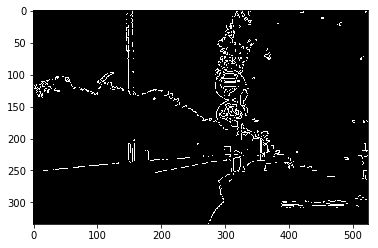

In [114]:
plt.imshow(thresh_process,cmap = 'gray')

In [50]:
image_shape_x,image_shape_y = thresh_process.shape[0], thresh_process.shape[1]

In [51]:
def find_edge_point(thresh_process):
    x, y = np.where(thresh_process>0)
    list_point = []
    for i in range(len(x)):
        point = [x[i], y[i]]
        list_point.append(point)
    return((list_point))

In [52]:
edge_point = find_edge_point(thresh_process)

In [53]:
len(edge_point)

5378

In [54]:
import math

from tqdm import tqdm

from tqdm._tqdm import trange

In [56]:
def find_circle(edge_point_list,r,image_shape_x,image_shape_y):
    map_vote = np.zeros([image_shape_x,image_shape_y,r])
    for k in tqdm(range(len(edge_point_list))):
        x_min = max(edge_point[k][0]-r,0)
        x_max = min(edge_point[k][0]+r,image_shape_x)
        y_min = max(edge_point[k][1]-r,0)
        y_max = min(edge_point[k][1]+r,image_shape_y)
        for i in range(x_min,x_max):
            for j in range(y_min,y_max):
                distance = math.sqrt((edge_point[k][0]-i)**2 + (edge_point[k][1]-j)**2)
                if (distance<r and distance>10):
                    map_vote[i][j][int(distance)] += 1/math.sqrt(distance)
    return map_vote

In [57]:
r = 30

In [58]:
map_vote = find_circle(edge_point,r,image_shape_x,image_shape_y)


 17%|█████████████▍                                                                | 929/5378 [00:07<00:39, 113.70it/s]


 33%|█████████████████████████▌                                                   | 1784/5378 [00:14<00:26, 134.32it/s]


 49%|██████████████████████████████████████                                       | 2657/5378 [00:22<00:23, 113.81it/s]


 65%|██████████████████████████████████████████████████                           | 3496/5378 [00:29<00:15, 123.26it/s]


 81%|██████████████████████████████████████████████████████████████▏              | 4347/5378 [00:36<00:09, 111.69it/s]


 97%|██████████████████████████████████████████████████████████████████████████▉  | 5234/5378 [00:44<00:01, 116.73it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 5378/5378 [00:45<00:00, 118.53it/s]

In [59]:
x, y, r = np.where(map_vote>0)

In [65]:
vote = []
for i in range(len(x)):
    vote.append(map_vote[x[i]][y[i]][r[i]])

In [66]:
max(vote)

17.79733192450585

In [64]:
temp=[]
Inf = 0
for i in tqdm(range(10)):
    temp.append(vote.index(max(vote)))
    vote[vote.index(max(vote))]=Inf
print(temp)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.88it/s]


[486474, 479806, 479828, 486370, 342881, 752785, 493136, 560526, 453612, 453652]


In [95]:
print(max(vote))

14.80210682187717


In [68]:
circle = []
for i in temp:
    circle.append([x[i],y[i],r[i]])

In [76]:
print(circle)

[[118, 309, 23], [117, 308, 22], [117, 309, 24], [118, 304, 19], [94, 310, 17], [164, 311, 24], [119, 309, 24], [129, 316, 18], [113, 306, 14], [113, 308, 14]]


In [82]:
np.uint8(256)

0

In [94]:
np.uint8(np.around(circle)).shape

(10, 3)

[118 309  23]
[117 308  22]
[117 309  24]
[118 304  19]
[ 94 310  17]
[164 311  24]


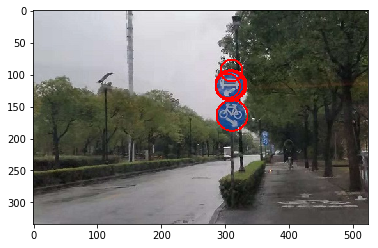

In [121]:
image = img[...,[2,1,0]]
circles = np.around(circle)  # 四舍五入，取整
for i in circles[:6]:
    print(i)
    cv2.circle(img, (i[1], i[0]), i[2], (0, 0, 255), 2)  # 画圆
plt.imshow(img[...,[2,1,0]] ,cmap = 'gray')


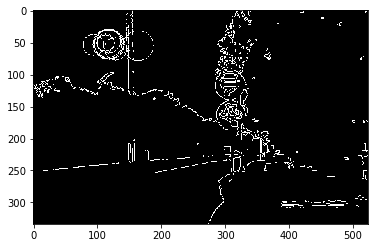

In [104]:
circles = np.uint8(np.around(circle))  # 四舍五入，取整
for i in circles[:]:
    cv2.circle(thresh_process, (i[0], i[1]), i[2], (255, 0, 0), 1)  # 画圆
plt.imshow(thresh_process,cmap = 'gray')